In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [ ]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# Set pandas display options for better readability
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
base_path = '/Users/swathimanne/Documents/carrer_foundry/Final CF'
accidents_cleaned_file = 'Cleaned/Accident_Information_Cleaned.csv'
vehicles_cleaned_file = 'Cleaned/Vehicle_Information_Cleaned.csv'

In [3]:
# Importing Accidents cleaned csv
accidents_df = pd.read_csv(os.path.join(base_path, accidents_cleaned_file))

In [4]:
# Importing Accidents cleaned csv
vehicles_df = pd.read_csv(os.path.join(base_path, vehicles_cleaned_file))

In [5]:
accidents_df.shape

(1389623, 35)

In [6]:
accidents_df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Time_Category'],
      dtype='object')

In [7]:
# Dropping unneeded columns and creating data subset
accidents_sub = accidents_df.drop(['Accident_Index','Accident_Severity', '1st_Road_Class','2nd_Road_Class','Date','Day_of_Week','Junction_Control','Junction_Detail','Light_Conditions','Local_Authority_(District)', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location','Police_Force','Road_Type','Special_Conditions_at_Site','Carriageway_Hazards','Road_Surface_Conditions','Weather_Conditions','Time','Urban_or_Rural_Area','Year','InScotland','Time_Category'], axis = 1)

In [20]:
accidents_sub.shape

(1389623, 12)

In [8]:
accidents_sub

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit
0,450.0,0.0,1.0,51.520075,524170.0,181650.0,-0.211708,1,1,0.0,5.0,30.0
1,0.0,0.0,1.0,51.525301,524520.0,182240.0,-0.206458,1,2,0.0,0.0,30.0
2,3220.0,0.0,1.0,51.482442,526900.0,177530.0,-0.173862,1,1,0.0,0.0,30.0
3,0.0,0.0,1.0,51.495752,528060.0,179040.0,-0.156618,1,1,0.0,0.0,30.0
4,0.0,0.0,1.0,51.515540,524770.0,181160.0,-0.203238,1,2,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1389618,7076.0,725.0,1.0,55.058998,319273.0,574564.0,-3.265390,1,2,0.0,0.0,30.0
1389619,7020.0,49.0,1.0,55.005033,316143.0,568615.0,-3.312631,2,2,0.0,0.0,60.0
1389620,74.0,0.0,1.0,55.048803,322903.0,573365.0,-3.208249,1,1,0.0,0.0,70.0
1389621,724.0,0.0,1.0,54.989597,318673.0,566850.0,-3.272584,3,1,0.0,0.0,40.0


In [63]:
df_acdts = accidents_sub[accidents_sub['2nd_Road_Number'].isnull () == True]

In [16]:
df_acdts

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit
6651,0.0,NaN,3.0,51.374239,547370.0,166040.0,0.115957,1,2,0.0,0.0,30.0
12999,0.0,NaN,2.0,54.109806,319850.0,468910.0,-3.227482,1,2,0.0,0.0,30.0
13054,590.0,NaN,1.0,54.262866,337500.0,485670.0,-2.961039,2,2,0.0,0.0,60.0
13126,597.0,NaN,2.0,54.646119,299710.0,529000.0,-3.555718,1,2,0.0,0.0,30.0
13198,595.0,NaN,1.0,54.424510,305920.0,504200.0,-3.451587,1,3,0.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1389217,0.0,NaN,1.0,55.468554,233873.0,622553.0,-4.629574,1,2,0.0,0.0,30.0
1389219,77.0,NaN,1.0,55.243516,218561.0,598084.0,-4.855614,1,1,0.0,4.0,30.0
1389268,77.0,NaN,1.0,54.999198,205722.0,571402.0,-5.039015,1,3,0.0,0.0,50.0
1389274,79.0,NaN,1.0,55.439728,234498.0,619318.0,-4.617774,1,1,0.0,0.0,30.0


In [25]:
##Dropping the Nan values in all the selected columns so we can perform better analysis. 
accidents_sub.dropna(subset =['2nd_Road_Number','1st_Road_Number','Did_Police_Officer_Attend_Scene_of_Accident','Latitude','Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Speed_limit'], inplace = True)

In [26]:
accidents_sub.isna().sum()

1st_Road_Number                                0
2nd_Road_Number                                0
Did_Police_Officer_Attend_Scene_of_Accident    0
Latitude                                       0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Number_of_Casualties                           0
Number_of_Vehicles                             0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Speed_limit                                    0
dtype: int64

In [9]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [29]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(accidents_sub).score(accidents_sub) for i in range(len(kmeans))] 

score

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-4.807291678450942e+16,
 -2.141532869618238e+16,
 -1.4006544174626404e+16,
 -8536672358955618.0,
 -6782479855680514.0,
 -5769858514216146.0,
 -4979407880502398.0,
 -4310177217190136.5,
 -3674769111008267.0]

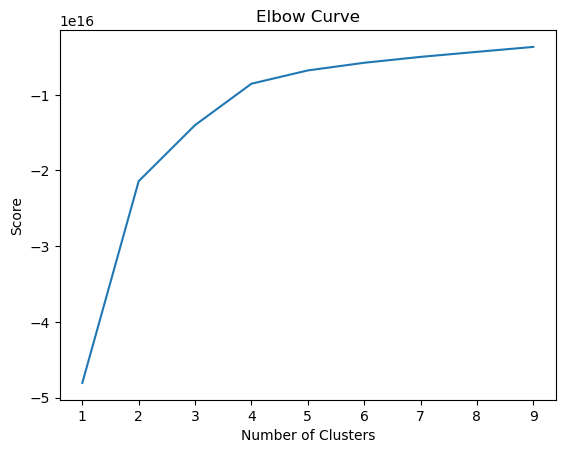

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from two to three on the X-axis and then increases slightly after three.so,the optimal number of clusters is three.

03. K-measns Clustering

In [31]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 3)

In [32]:
# Fit the k-means object to the data.

kmeans.fit(accidents_sub)

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [44]:
accidents_sub['clusters'] = kmeans.fit_predict(accidents_sub)

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
accidents_sub['clusters'].value_counts()

clusters
0    717208
1    516403
2    142310
Name: count, dtype: int64

In [40]:
accidents_sub['clusters']

0          0
1          0
2          0
3          0
4          0
          ..
1389618    2
1389619    2
1389620    2
1389621    2
1389622    2
Name: clusters, Length: 1375921, dtype: int32

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


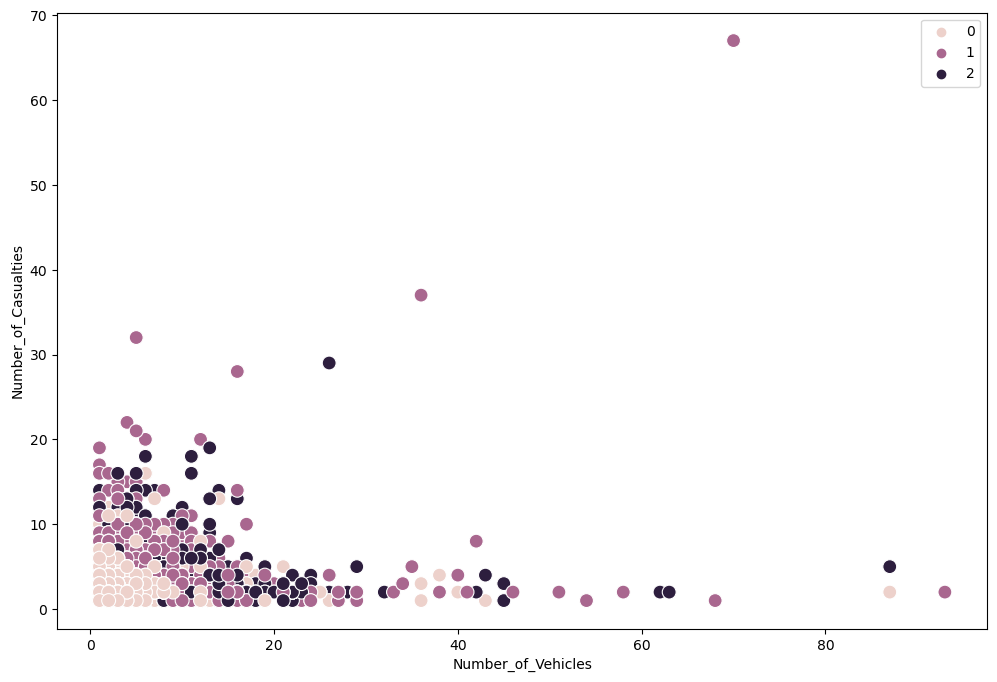

In [49]:
# Plot the clusters for the "Number_of_casualities" and "Number_of_vehicles" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = accidents_sub['Number_of_Casualties'], y = accidents_sub['Number_of_Vehicles'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Number_of_Casualties')
plt.show()

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


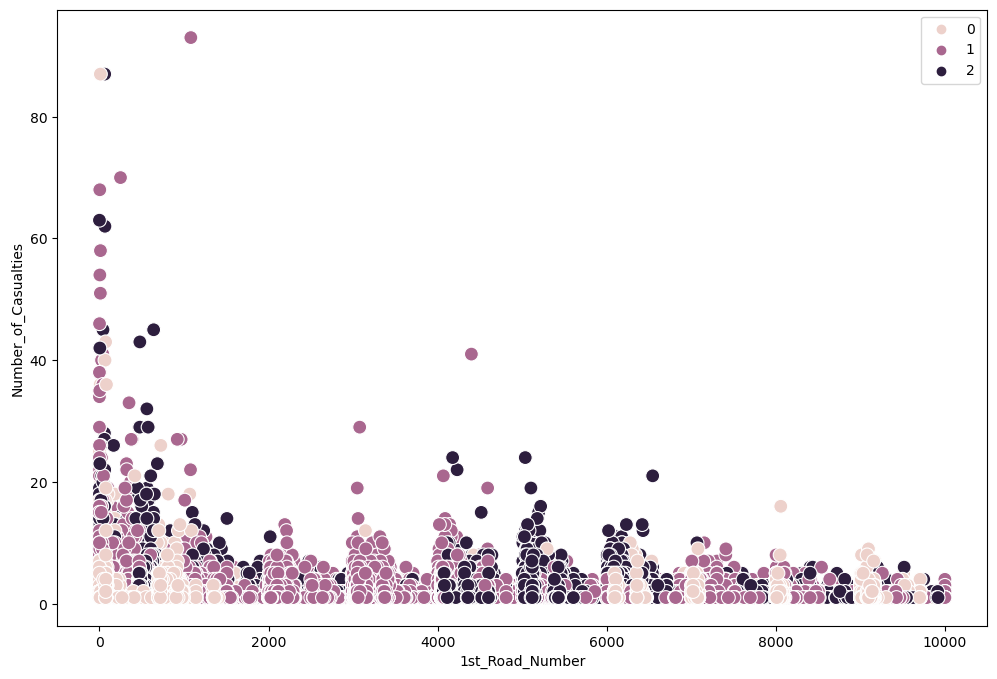

In [54]:
# Plot the clusters for the "1st_Road_Number" and "Number_of_Casualties" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = accidents_sub['1st_Road_Number'], y = accidents_sub['Number_of_Casualties'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('1st_Road_Number')
plt.ylabel('Number_of_Casualties')
plt.show()

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


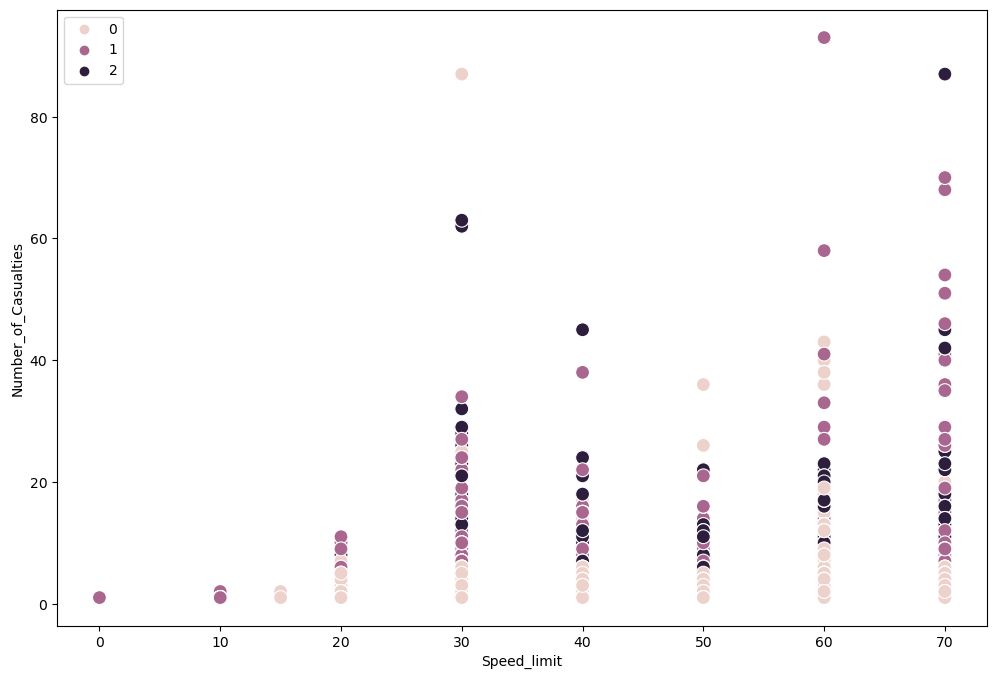

In [56]:
# Plot the clusters for the "Speed_limit" and "Number_of_Casualties" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = accidents_sub['Speed_limit'], y = accidents_sub['Number_of_Casualties'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Speed_limit')
plt.ylabel('Number_of_Casualties')
plt.show()

Conclusions
These findings auggest that the pink cluster has highest number of casualities in terms of 1st road number, spped limit and number of vehicles, followed by light coloured cluster while the dark cluster tends to have lower levels on these indicators. These clusters represent different levels of casualities across the roads, speeds and number of vehicles involved.

In [59]:
accidents_sub.loc[accidents_sub['clusters'] == 2, 'cluster'] = 'dark'
accidents_sub.loc[accidents_sub['clusters'] == 1, 'cluster'] = 'purple'
accidents_sub.loc[accidents_sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/n3/cnsw2_q5653501p8bw3zft6h0000gp/T/ipykernel_37514/1244567542.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  accidents_sub.loc[accidents_sub['clusters'] == 2, 'cluster'] = 'dark'


In [60]:
accidents_sub.groupby('cluster').agg({'Number_of_Casualties':['mean', 'median'], 
                         'Number_of_Vehicles':['mean', 'median'], 
                         'Speed_limit':['mean', 'median'],
                          '1st_Road_Number':['mean', 'median']})

Number_of_Casualties        Number_of_Vehicles        Speed_limit  \
                        mean median               mean median        mean   
cluster                                                                     
dark                1.442721    1.0           1.935518    2.0   38.912249   
pink                1.364642    1.0           1.821388    2.0   41.582979   
purple              1.336157    1.0           1.925137    2.0   38.925429   

               1st_Road_Number         
        median            mean median  
cluster                                
dark      30.0     1245.950082   64.0  
pink      30.0      923.524991  142.0  
purple    30.0      823.851176  141.0

Analysis of Findings:

Number_of_Casualties:
Across clusters, the mean number of casualties varies:
Highest in the 'dark' cluster (mean ≈ 1.44)
Lowest in the 'purple' cluster (mean ≈ 1.34)

Number_of_Vehicles:
The mean number of vehicles involved in accidents also differs across clusters:
Highest in the 'dark' cluster (mean ≈ 1.94)
Lowest in the 'pink' cluster (mean ≈ 1.82)

Speed_limit:
Speed limits exhibit variation among clusters, with the 'pink' cluster having the highest mean speed limit (≈ 41.58) and the 'dark' cluster having the lowest (≈ 38.91).

1st_Road_Number:
The mean values for the 1st road number differ across clusters, with the 'dark' cluster having the highest mean (≈ 1246) and the 'purple' cluster having the lowest (≈ 824).
These results could be useful for in future steps for understanding the mean and median values across clusters helps identify clusters with higher or lower mean casualties, vehicles involved, speed limits, and road numbers.

# Propose what these results could be useful for in future steps of an analytics pipeline.


Future Steps in Analytics Pipeline:

-Assess which variables have a more significant impact on the number of casualties 
-Use these variables as features in predictive models to forecast the number of casualties in future accidents
-Explore relationships between these variables and casualty counts to identify risk factors contributing to higher casualties
-Prioritize safety interventions in clusters with higher casualty rates to reduce the number of casualties in accidents

Utilizing these insights in future analytics steps could aid in developing targeted interventions and predictive models to mitigate risks and improve road safety.
